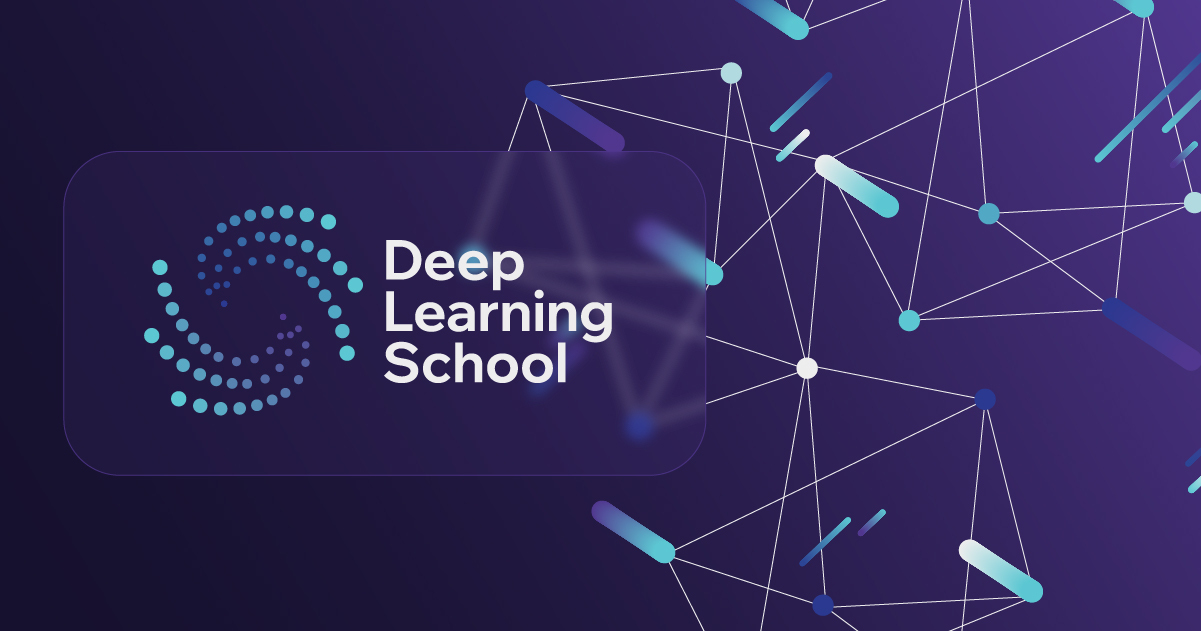

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

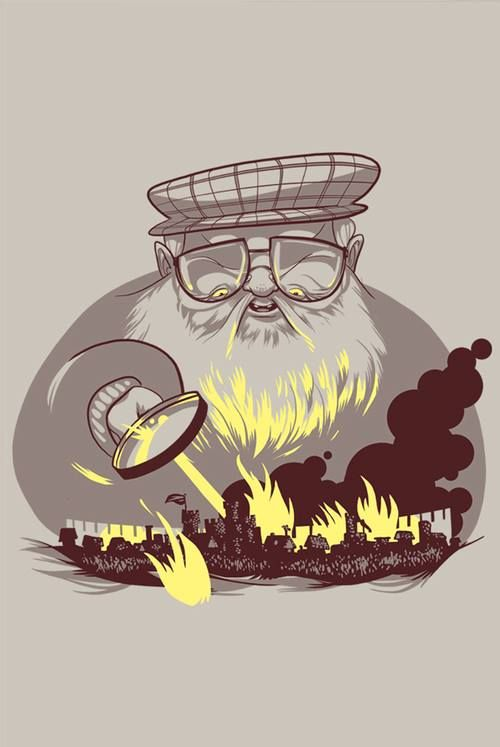

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется в живых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.65$ --- 5 баллов

2) $0.65 > score \geqslant 0.50$ --- 4 балла

3) $0.50 > score \geqslant 0.45$ --- 3 балла

4) $0.45 > score \geqslant 0.40$ --- 2 балла

5) $0.40 > score \geqslant 0.35$ --- 1 балл

6) $0.35 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [38]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 58.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 74.0MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [40]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')

Посмотрите, какие типы данных представлены в нашем датасете

Знакомый нам метод describe() возвращает различную информацию для столбцов с числовыми типами данных, и с типами данных *object*

Давайте посмотрим на вывод для типа данных *object*. Для этого:
- сначала применим метод describe(). Укажем в качестве аргумента тип данных столбцов, статистику по которым мы хотим посмотреть (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
- для удобства восприятия транспонируем таблицу

In [41]:
data.describe(include = 'object').T

,count,unique,top,freq
name,1557,1557,Melara Hetherspoon,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6


Теперь давайте посмотрим на столбцы с числовыми типами данных. Дополните код ниже. Для удобства восприятия мы транспонировали таблицу и ограничили вывод тремя столбцами - количество строк без NaN, максимальное и минимальное значение (о кастомизации вариантах вывода describe() вы можете почитать в документации по ссылке выше).


In [64]:
# Альтернативный вариант с использованием 'number'
data.describe(include = 'number').T[['count', 'min', 'max']]

,count,min,max
male,1557.0,0.0,1.000000
dateOfBirth,279.0,-25.0,299.000000
book1,1557.0,0.0,1.000000
book2,1557.0,0.0,1.000000
book3,1557.0,0.0,1.000000
book4,1557.0,0.0,1.000000
book5,1557.0,0.0,1.000000
isAliveMother,18.0,0.0,1.000000
isAliveFather,22.0,0.0,1.000000
isAliveHeir,21.0,0.0,1.000000


Так мы проверим, есть ли в данных неадекватнные значения.   Большинство числовых столбцов - это числа от 0 до 1. Отрицательные значения `dateOfBirth` не являются ошибкой. Значения age и `numDeadRelations` также выглядят адекватными. Можно переходить к дальнейшим шагам анализа (анонс - а в тестовых данных нас будет ждать сюрприз).

**Задание 1.3.** Предобработка (очистка) данных.

В нашем домашнем задании все пропуски в данных (missing values) уже закодированы как NaN. Проанализируйте, в каких колонках и как часто встречаются NaN значения. Далее вам надо будет принять решение, как их обрабатывать.

In [43]:
print("Количество пропущенных значений по столбцам:")
print(data.isnull().sum())

Количество пропущенных значений по столбцам:
name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64


В этом задании удалять строки с NaN (dropna) мы не будем по следующим причинам:
- в обучающем датасете много признаков с большим количество пропусков. Если удалять все строки с NaN, то размер выборки сильно уменьшится. Мы потеряем много данных, которые можно было бы использовать для построения более точной модели.
- тестовом датасете также много признаков с NaN (вы можете в этом убедиться, если скачаете датасет и совершите с ним те же действия, что выше проделали с обучаюшим датасетом). Поэтому нам все-равно придется придумать способ кодировать NaN, чтобы модель делала прогнозы для всех персонажей из тестового датасета. Для этого нам потребуется сохранять, а не удалять данные в обучающем датасете.     



Как вы могли заметить, в наших данных очень много пропущенных значений, причём в некоторых случая пропущена **большая** часть значений. Поэтому заполнять по умолчанию медианой/средним/модой в данном случае - не самый лучший способ (однако, это довольно часто используемый метод заполнения, который может пригодиться вам в будущем)

Ниже мы посмотрим, как можно работать с признаками с большим количеством пропущенных значений.

**Задание 1.4.** Числовые признаки

У нас есть **признак popularity**. Постройте гистограмму распределения данного признака с количеством интервалов (bins), равным 50 (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

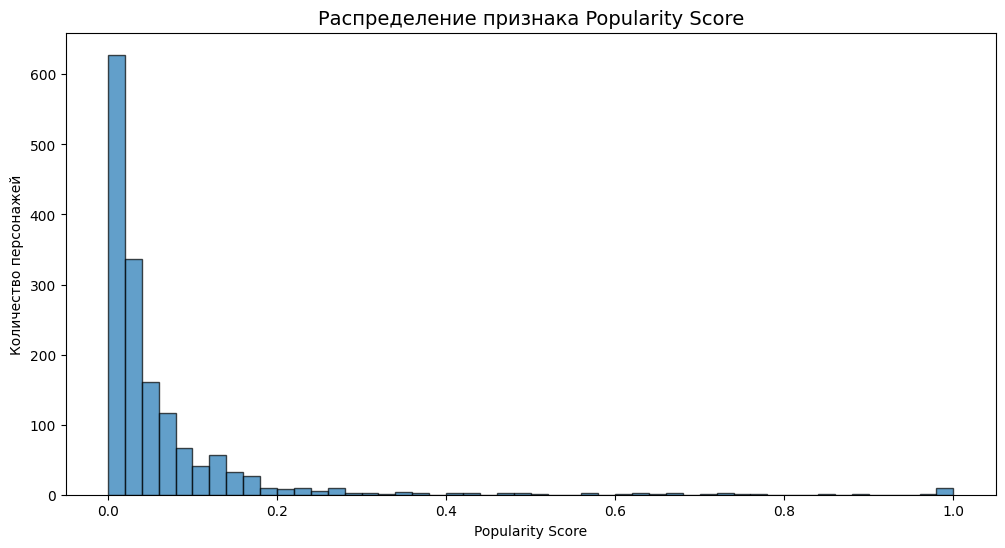

In [44]:
plt.figure(figsize=(12, 6))
data['popularity'].hist(bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение признака Popularity Score', fontsize=14)
plt.xlabel('Popularity Score')
plt.ylabel('Количество персонажей')
plt.grid(False)
plt.show()

Распределение сильно несимметрично. Можно преобразовать данный признак, например, по формуле `np.log10(data["popularity"]*M+1)` (добавляем 1 ради логарифма, так как для нектоторых персонажей `popularity==0`). В качестве M можно попробовать, например, M=100 или другое число.

При желании для `popularity` вы можете использовать свой способ шкалирования признаков с несимметричным распределением.


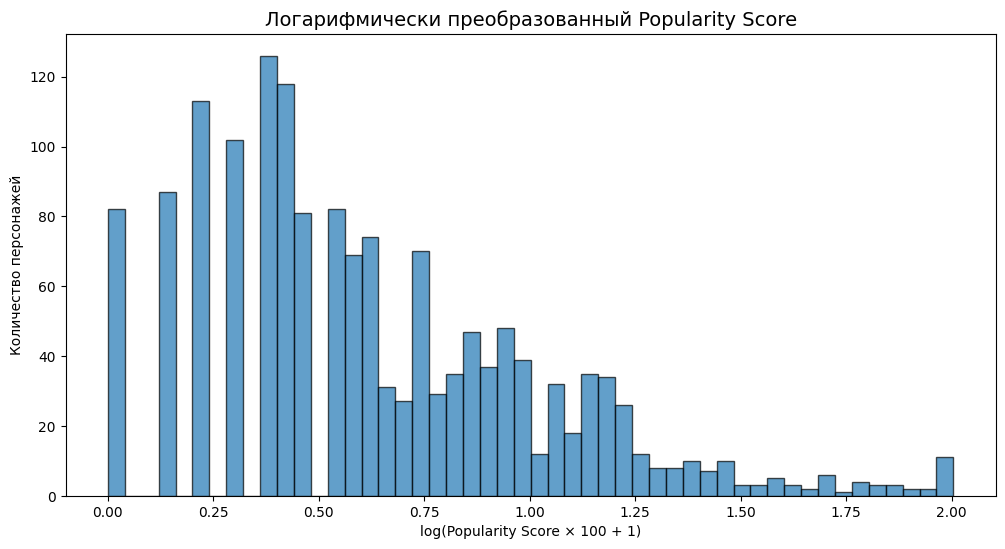

In [45]:
import numpy as np

M = 100
data['log_popularity'] = np.log10(data['popularity'] * M + 1)

plt.figure(figsize=(12, 6))
data['log_popularity'].hist(bins=50, edgecolor='black', alpha=0.7)
plt.title('Логарифмически преобразованный Popularity Score', fontsize=14)
plt.xlabel('log(Popularity Score × 100 + 1)')
plt.ylabel('Количество персонажей')
plt.grid(False)
plt.show()

В качестве альтернативного подхода вы можете попробовать дискретизацию признака popularity на основе квантилей (quantile binning), используя функцию qcut() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html). В этом случае вы преобразуете числовой признак popularity в категориальный, для которого в дальнейшем надо будет применить one-hot кодирование.

Теперь давайте обработаем **признак numDeadRelations**.
Посмотрите на частотное распределение этого признака. Лишь для малого числа персонажей `numDeadRelations>0`.

Создайте признак `boolDeadRelations`. Давайте упростим признак `numDeadRelations`, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. `numDeadRelations > 0`, и те, у которых не было, т.е. `numDeadRelations = 0`.


Распределение boolDeadRelations:
boolDeadRelations
0    1488
1      69
Name: count, dtype: int64

Доля персонажей с умершими родственниками: 4.43%


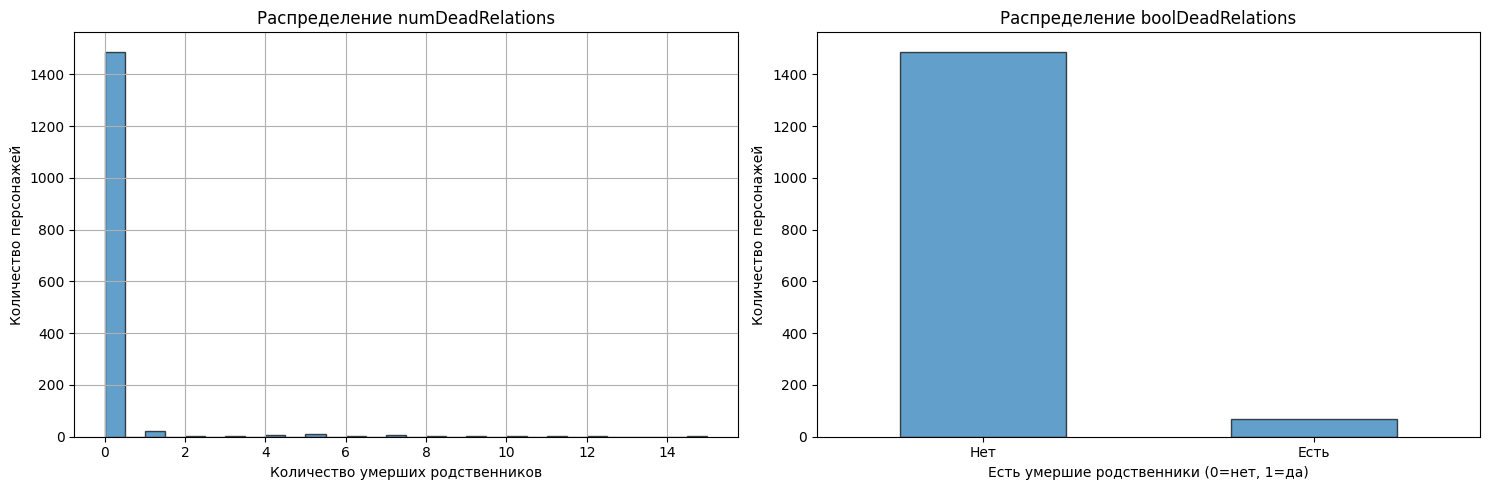

In [46]:
# Создаем бинарный признак boolDeadRelations
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)

# Проверяем распределение нового признака
print("\nРаспределение boolDeadRelations:")
print(data['boolDeadRelations'].value_counts())

print(f"\nДоля персонажей с умершими родственниками: {data['boolDeadRelations'].mean():.2%}")

# Визуализируем оба распределения для сравнения
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Исходное распределение
data['numDeadRelations'].hist(bins=30, ax=ax1, edgecolor='black', alpha=0.7)
ax1.set_title('Распределение numDeadRelations')
ax1.set_xlabel('Количество умерших родственников')
ax1.set_ylabel('Количество персонажей')

# Новое бинарное распределение
data['boolDeadRelations'].value_counts().sort_index().plot(kind='bar', ax=ax2, edgecolor='black', alpha=0.7)
ax2.set_title('Распределение boolDeadRelations')
ax2.set_xlabel('Есть умершие родственники (0=нет, 1=да)')
ax2.set_ylabel('Количество персонажей')
ax2.set_xticklabels(['Нет', 'Есть'], rotation=0)

plt.tight_layout()
plt.show()

Наконец, давайте посмотрим на **признак age**. В нем очень много пропущенных значений. Для того, чтобы использовать в модели информацию о возрасте персонажа, мы создадим два новых признака: `age_value` и `age_no_data`

- Там где возраст указан, age_value принимает значение `age`, а `age_no_data` - значение 0.
- Там где возраст не указан, `age_value` принимает значение 0, а `age_no_data` - значение 1.  

Фактически, в переменной `age` мы заменяем NaN на 0, но одновременно добавляем в модель еще один бинарный признак `age_no_data`, несущий информацию о том, у каких персонажей не был указан возраст:        

In [47]:
# Создаем два новых признака для возраста
data['age_value'] = data['age'].fillna(0)  # Заменяем NaN на 0
data['age_no_data'] = [1 if np.isnan(x) else 0 for x in data['age']]

# Проверяем результат
print("Проверка созданных признаков:")
print(f"Количество пропусков в исходном столбце age: {data['age'].isnull().sum()}")
print(f"Уникальные значения age_value: {sorted(data['age_value'].unique())[:10]}")  # Показываем первые 10 уникальных значений
print(f"Распределение age_no_data: {data['age_no_data'].value_counts()}")

Проверка созданных признаков:
Количество пропусков в исходном столбце age: 1278
Уникальные значения age_value: [np.float64(0.0), np.float64(2.0), np.float64(3.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0)]
Распределение age_no_data: age_no_data
1    1278
0     279
Name: count, dtype: int64


Этот способ чем-то похож на работу с категориальной переменными с пропущенными значениями, когда мы добавляем еще одну категорию no_data и заменяем NaN на значение этой категории.

Если вы заходите похожим образом образом обработать признак `dateOfBirth`, **обратите внимание**, что у одних и тех же персонажей не указан и возраст, и год рождения.
То есть созданные признаки `age_no_data` и `dateOfBirth_no_data` будут полностью совпадать, и в модель надо будет включать только один из признаков: или `age_no_data`, или `dateOfBirth_no_data`.

**Задание 1.5.** Категориальные признаки с большим количеством категорий

**Признак culture** содержит информацию о принадлежности к одному из народов во вселенной Игры Престолов.

Давайте посмотрим, какие значения принимает данный признак. По умолчанию метод `value_counts()` игнорирует пропуски в данных, поэтому используем этот метод с параметром **dropna** со значением **False** (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [48]:
# Анализируем значения признака culture, включая пропуски
data['culture'].value_counts(dropna=False)

,count
culture,
NaN,1069
Northmen,94
Ironborn,91
Free Folk,45
Braavosi,39
Valyrian,28
Ghiscari,17
Dornish,17
Dothraki,17


Из полученного частотного распределения видно, что для большого числа персонажей значения данного признака не указаны. Также есть много редких значений признака, которые в выборке повторяются один или несколько раз. Причина отчасти в том, что один и тот же народ упоминается в нашем датасете под разными названиями.

Данную проблему мы попытаемся решить, сгруппировав народы в более крупные категории. Так мы одновременно решим проблему того, что один и тот же народ назван в выборке разными способами.

Предоженный вариант группировки имеет определенную логику. Выделяются следующие группы:
- старые нации, которые уже не сущевали как отдельные народы на момент повествования основной линии повествования романов, но отдельные потомки могли еще быть живы
- народы, проживающие в королевствах континента Весторос (для каждого королевства - своя группа)
- народы континента Эссос
- прочие народы

In [49]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

**Обратите внимание, что некоторые варианты названий народов встречаются только в тестовых данных, и не встречаются в обучающих данных.** Такая ситуация нередко случается на практике. Поэтому, после обработки обучающих данных и обучения модели важно задать для модели правило, как она должна обрабатывать "незнакомые" категории в категориальных признаках. Например, можно относить объекты с "незнакомой" категорией к некоторой существующей категории или указать формулу расчета для "незнакомой" категории.     

Предложенный вам словарь `cultures_grouped` составлен по всем значениям признака `culture`, встречающимся в тренировочном либо в тестовом датасете. Здесь важно, что все укрупненные категории (ключи/keys словаря `cultures_grouped`) представлены в обоих датасетах, а уникальные для тестового датасета названия народов - это отдельные названия народов внутри укрупненных категорий (значения/values словаря). Поэтому, когда вы будете работать с тестовыми - просто применяйте этот словарь без указания правила обработки "незнакомых" категорий.

Давайте приступим к кодировке значений признака culture.
Для этого сначала инвертируем словарь *cultures_grouped*

In [50]:
#Довольно просто инвертировать словарь, где ключу соответствует одно значение
#В нашем случае ключу соответствует список значений.
#Ниже показан пример, как можно инвертировать такой словарь

d = {'A': ['a1', 'a2', 'a3'],
     'B': ['b1', 'b2', 'b3', 'b4']}

d_inverted = {}
for k in d.keys():
  for v in d[k]:
      d_inverted.update({v:k})

d_inverted

{'a1': 'A', 'a2': 'A', 'a3': 'A', 'b1': 'B', 'b2': 'B', 'b3': 'B', 'b4': 'B'}

In [51]:
cultures_grouped_inverted = {}
for group_name, culture_list in cultures_grouped.items():
    for culture in culture_list:
        cultures_grouped_inverted.update({culture: group_name})

cultures_grouped_inverted

{'valyrian': 'Old Nations',
 'first men': 'Old Nations',
 'andal': 'Old Nations',
 'andals': 'Old Nations',
 'rhoynar': 'Old Nations',
 'northmen': 'the North',
 'northern mountain clans': 'the North',
 'crannogmen': 'the North',
 'ironborn': 'the Iron Islands',
 'ironmen': 'the Iron Islands',
 'valemen': 'the Mountain and the Vale',
 'vale': 'the Mountain and the Vale',
 'vale mountain clans': 'the Mountain and the Vale',
 'sistermen': 'the Mountain and the Vale',
 'riverlands': 'the Isles and Rivers',
 'rivermen': 'the Isles and Rivers',
 'westerman': 'the Rock',
 'westermen': 'the Rock',
 'westerlands': 'the Rock',
 'stormlander': 'the Stormlands',
 'stormlands': 'the Stormlands',
 'reach': 'the Reach',
 'reachmen': 'the Reach',
 'the reach': 'the Reach',
 'dornish': 'Dorne',
 'dornishmen': 'Dorne',
 'dorne': 'Dorne',
 'astapor': 'Essos Nations',
 'astapori': 'Essos Nations',
 'braavosi': 'Essos Nations',
 'braavos': 'Essos Nations',
 'tyroshi': 'Essos Nations',
 'lysene': 'Essos Na

Теперь создадим новый столбец с укрупненными значениями culture.

Для этого будем использовать метод `map()` с инвертированным словарем в качестве аргумента (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

Обратите внимание, что в словаре названия народов указаны в нижнем регистре. А в датасете используется как нижний, так и верхний регистр. Поэтому перед применением метода `map()` переведем значения столбца culture в нижний регистр при помощи метода `str.lower()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html).

In [52]:
data['culture_grouped'] = data['culture'].str.lower().map(cultures_grouped_inverted)

Осталось заменить все NaN в созданном столбце на категорию `culture_no_data`:

In [53]:
# Заменяем все NaN на категорию 'culture_no_data'
data['culture_grouped'] = data['culture_grouped'].fillna('culture_no_data')

# Проверяем результат
print("Распределение culture_grouped:")
print(data['culture_grouped'].value_counts(dropna=False))

Распределение culture_grouped:
culture_grouped
culture_no_data              1069
Essos Nations                 109
the North                     108
the Iron Islands               95
Other Nations                  57
Old Nations                    32
the Mountain and the Vale      25
Dorne                          21
the Rock                       14
the Reach                      13
the Isles and Rivers           10
the Stormlands                  4
Name: count, dtype: int64


Распределение сгруппированной переменной выглядит гораздо лучше. Но по прежнему есть несколько слабо представленых групп.

Дальнейшую работу с этим признаком проводите на свое усмотрение для повышения качества прогноза модели. Например, можно объединить несколько слабо представленных категорий в одну или применить другой подход.

**Задание 1.6.** Категориальные признаки в линейных моделях

Для включения категориальных признаков в линейную модель их нужно преобразовать в числовые признаки.

Если признак принимает одно из двух возможных значений (например, персонаж "появляется" или "не появляется" в 1-й книге), он напрямую кодируется в бинарный признак ("появляется" -> 1, "не появляется" -> 0). Если признак принимает больше двух значений, его можно преобразовать в несколько бинарных при помощи one-hot преобразования. В некоторых случаях бывает полезно объединить некоторые категории, как мы это поступили с признаком *culture*.

Порядковых признаков у нас в задаче нет, поэтому рассматривать их здесь мы не будем.

Для того, чтобы найти все порядковые признаки, посмотрим на количество уникальных значений, которые встречаются в столбцах. Для столбцов с типом object количество уникальных значений мы выводили  при помощи метода `describe()` в задании 1.2.

Чтобы посмотреть количество уникальных значений для всех столбцов, можно воспользоваться методом nunique() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)

In [54]:
# Количество уникальнх значений в каждом столбце
data.nunique()

,0
name,1557
title,195
male,2
culture,51
dateOfBirth,105
mother,16
father,19
heir,20
house,315
spouse,186


In [55]:
# Для числовых столбцов можно вывести в одну таблицу более детальную статистику, объединив выводы describe() и nunique()
# Код ниже требуется дополнить по аналогии с заданием 1.2.
# Детальная статистика для числовых столбцов
data.describe(include = ['int64', 'float64']).T[['count', 'min', 'max']].assign(N_unique_values = data.select_dtypes(include=['int64', 'float64']).nunique())

,count,min,max,N_unique_values
male,1557.0,0.0,1.000000,2
dateOfBirth,279.0,-25.0,299.000000,105
book1,1557.0,0.0,1.000000,2
book2,1557.0,0.0,1.000000,2
book3,1557.0,0.0,1.000000,2
book4,1557.0,0.0,1.000000,2
book5,1557.0,0.0,1.000000,2
isAliveMother,18.0,0.0,1.000000,2
isAliveFather,22.0,0.0,1.000000,2
isAliveHeir,21.0,0.0,1.000000,2


Посмотрев на количество уникальных значений мы можем выделить категориальные признаки. Например, `popularity` принимает значения от 0 до 1, но это непрерывный числовой признак. Остальные признаки со значениями от 0 до 1 - принимают только два значения, то есть являются бинарными.

Бинарные признаки без NaN полностью готовы для включения в модель. Некоторые бинарные признаки содержат пропуски, поэтому, если вы захотите включить их в модель, их потребуется обработать.

Для бинарных признаков их связь с зависимой переменной можно прикинуть по таблице корреляций. Для категориальных признаков с количеством значений больше двух (или с двумя значениями и NaN) можно сделать one-hot преобразования и посчитать корреряцию зависимой переменной с набором сгенерированных бинарных признаков.
В качестве альтернативного подхода можно использовать сравнение средних значений зависимой переменной для разных категорий исследуемого признака. Чем сильнее различаются средние значения целевой переменной между категориями, тем вероятнее, что данный признак связан с зависимой переменной.

In [56]:
# попробуйте провести сравнение средних зависимой пременной isAlive для признака isAliveSpouse
# одним из приведенных ниже способов:

# data.groupby('НАЗВАНИЕ ПРИЗНАКА', dropna = False)['isAlive'].mean()
# Способ 1: Использование groupby
print("Сравнение средних с помощью groupby:")
print(data.groupby('isAliveSpouse', dropna=False)['isAlive'].mean())

print("\n" + "="*50 + "\n")

# Способ 2: Использование pivot_table
print("Сравнение средних с помощью pivot_table:")
print(pd.pivot_table(data=data, values='isAlive', index='isAliveSpouse', aggfunc=['mean', 'count'], dropna=False))

Сравнение средних с помощью groupby:
isAliveSpouse
0.0    0.619048
1.0    0.753165
NaN    0.786293
Name: isAlive, dtype: float64


Сравнение средних с помощью pivot_table:
                   mean   count
                isAlive isAlive
isAliveSpouse                  
0.0            0.619048      42
1.0            0.753165     158
NaN            0.786293    1357


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик. Не забудьте, что потом аналогичным образом вам надо будет преобразовывать тестовый датасет, используя тот же алгоритм кодирования признаков.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

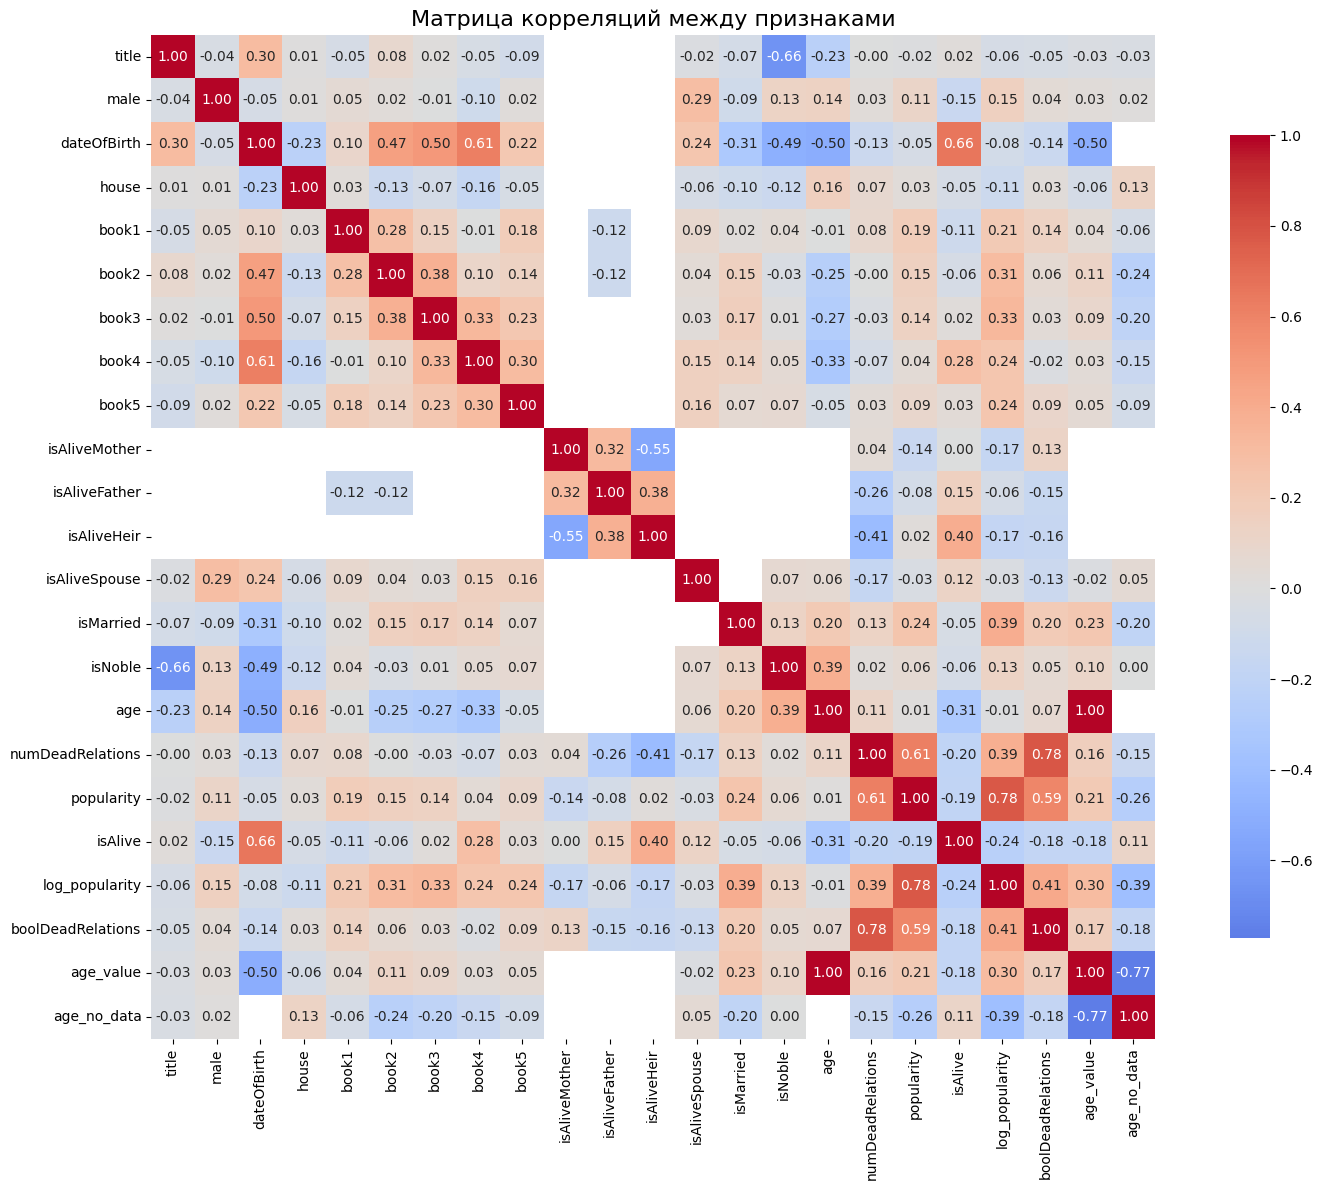

Наиболее сильно коррелирующие пары признаков:
('age_value', 'age'): 1.000
('age', 'age_value'): 1.000
('boolDeadRelations', 'numDeadRelations'): 0.782
('numDeadRelations', 'boolDeadRelations'): 0.782
('log_popularity', 'popularity'): 0.778
('popularity', 'log_popularity'): 0.778
('dateOfBirth', 'isAlive'): 0.656
('isAlive', 'dateOfBirth'): 0.656
('popularity', 'numDeadRelations'): 0.614
('numDeadRelations', 'popularity'): 0.614

Корреляция признаков с целевой переменной isAlive:
dateOfBirth: 0.656
isAliveHeir: 0.395
book4: 0.284
isAliveFather: 0.155
isAliveSpouse: 0.122
age_no_data: 0.114
book5: 0.033
title: 0.021
book3: 0.018
isAliveMother: 0.000
isMarried: -0.049
house: -0.053
book2: -0.056
isNoble: -0.061
book1: -0.112
male: -0.148
boolDeadRelations: -0.178
age_value: -0.182
popularity: -0.194
numDeadRelations: -0.199
log_popularity: -0.242
age: -0.311


In [57]:
# Обработка категориальных признаков и перевод их в числа
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем копию данных для обработки
data_encoded = data.copy()

# 1. Обработка категориальных признаков
categorical_columns = ['culture_grouped', 'title', 'house']  # Добавьте другие категориальные признаки

# Для категориальных признаков с небольшим количеством категорий используем OneHotEncoding
# Для признаков с большим количеством категорий используем LabelEncoding

# Пример для culture_grouped (OneHotEncoding)
if 'culture_grouped' in data_encoded.columns:
    culture_dummies = pd.get_dummies(data_encoded['culture_grouped'], prefix='culture')
    data_encoded = pd.concat([data_encoded, culture_dummies], axis=1)
    data_encoded.drop('culture_grouped', axis=1, inplace=True)

# Пример для других категориальных признаков (LabelEncoding)
label_encoders = {}
for col in categorical_columns:
    if col != 'culture_grouped' and col in data_encoded.columns:
        le = LabelEncoder()
        data_encoded[col] = le.fit_transform(data_encoded[col].astype(str))
        label_encoders[col] = le  # Сохраняем кодировщик для тестового набора

# 2. Анализ корреляции между количественными признаками
numerical_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Создаем матрицу корреляции
plt.figure(figsize=(16, 12))
correlation_matrix = data_encoded[numerical_columns].corr()

# Визуализируем тепловую карту корреляций
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={"shrink": .8})
plt.title('Матрица корреляций между признаками', fontsize=16)
plt.tight_layout()
plt.show()

# Выводим наиболее сильно коррелирующие пары признаков
print("Наиболее сильно коррелирующие пары признаков:")
corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
# Исключаем корреляцию признака с самим собой
high_corr = [(pair, corr) for pair, corr in corr_pairs.items()
             if pair[0] != pair[1] and abs(corr) > 0.5]
for pair, corr in high_corr[:10]:  # Топ-10 наиболее коррелирующих пар
    print(f"{pair}: {corr:.3f}")

# Анализ корреляции с целевой переменной isAlive
if 'isAlive' in data_encoded.columns:
    target_corr = correlation_matrix['isAlive'].sort_values(ascending=False)
    print("\nКорреляция признаков с целевой переменной isAlive:")
    for feature, corr in target_corr.items():
        if feature != 'isAlive':
            print(f"{feature}: {corr:.3f}")

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [65]:
# Анализ влияния признаков на целевую переменную isAlive

# 1. Анализ корреляции числовых признаков с целевой переменной
print("КОРРЕЛЯЦИЯ ПРИЗНАКОВ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ ISALIVE:")
print("=" * 50)

# Вычисляем корреляции с целевой переменной
if 'isAlive' in data_encoded.columns:
    target_corr = data_encoded.corr()['isAlive'].sort_values(ascending=False)
    print("Корреляция признаков с isAlive:")
    for feature, corr in target_corr.items():
        if feature != 'isAlive' and abs(corr) > 0.05:  # Показываем только значимые корреляции
            print(f"{feature}: {corr:.3f}")

# 2. Анализ влияния категориальных признаков на выживаемость
print("\n" + "=" * 50)
print("ВЛИЯНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ НА ВЫЖИВАЕМОСТЬ:")
print("=" * 50)

categorical_features = ['culture_grouped', 'title', 'house', 'male']  # Добавьте нужные категориальные признаки

for feature in categorical_features:
    if feature in data.columns:
        print(f"\n--- {feature.upper()} ---")
        # Создаем сводную таблицу с долей выживших и количеством наблюдений
        pivot = pd.pivot_table(data=data,
                              values='isAlive',
                              index=feature,
                              aggfunc=['mean', 'count'])
        pivot.columns = ['survival_rate', 'count']
        pivot = pivot.sort_values('survival_rate', ascending=False)
        print(pivot.head(10))  # Показываем топ-10 категорий по выживаемости

# 3. Визуализация влияния ключевых признаков
print("\n" + "=" * 50)
print("ВИЗУАЛИЗАЦИЯ ВЛИЯНИЯ КЛЮЧЕВЫХ ПРИЗНАКОВ:")
print("=" * 50)

# Создаем подграфики для визуализации
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Влияние признаков на выживаемость персонажей', fontsize=16)

# График 1: Влияние популярности на выживаемость
if 'log_popularity' in data_encoded.columns:
    sns.boxplot(data=data, x='isAlive', y='log_popularity', ax=axes[0,0])
    axes[0,0].set_title('Влияние популярности на выживаемость')
    axes[0,0].set_xlabel('Выжил (1=да, 0=нет)')
    axes[0,0].set_ylabel('Логарифм популярности')

# График 2: Влияние возраста на выживаемость
if 'age_value' in data_encoded.columns:
    sns.boxplot(data=data, x='isAlive', y='age_value', ax=axes[0,1])
    axes[0,1].set_title('Влияние возраста на выживаемость')
    axes[0,1].set_xlabel('Выжил (1=да, 0=нет)')
    axes[0,1].set_ylabel('Возраст')

# График 3: Влияние наличия умерших родственников
if 'boolDeadRelations' in data_encoded.columns:
    survival_by_dead_rel = data.groupby('boolDeadRelations')['isAlive'].mean()
    axes[0,2].bar(survival_by_dead_rel.index, survival_by_dead_rel.values)
    axes[0,2].set_title('Влияние умерших родственников на выживаемость')
    axes[0,2].set_xlabel('Есть умершие родственники (1=да)')
    axes[0,2].set_ylabel('Доля выживших')

# График 4: Влияние знатности
if 'isNoble' in data_encoded.columns:
    survival_by_noble = data.groupby('isNoble')['isAlive'].mean()
    axes[1,0].bar(survival_by_noble.index, survival_by_noble.values)
    axes[1,0].set_title('Влияние знатности на выживаемость')
    axes[1,0].set_xlabel('Знатный (1=да)')
    axes[1,0].set_ylabel('Доля выживших')

# График 5: Влияние пола
if 'male' in data_encoded.columns:
    survival_by_gender = data.groupby('male')['isAlive'].mean()
    axes[1,1].bar(survival_by_gender.index, survival_by_gender.values)
    axes[1,1].set_title('Влияние пола на выживаемость')
    axes[1,1].set_xlabel('Мужчина (1=да)')
    axes[1,1].set_ylabel('Доля выживших')

# График 6: Влияние наличия данных о возрасте
if 'age_no_data' in data_encoded.columns:
    survival_by_age_data = data.groupby('age_no_data')['isAlive'].mean()
    axes[1,2].bar(survival_by_age_data.index, survival_by_age_data.values)
    axes[1,2].set_title('Влияние наличия данных о возрасте')
    axes[1,2].set_xlabel('Возраст неизвестен (1=да)')
    axes[1,2].set_ylabel('Доля выживших')

plt.tight_layout()
plt.show()

# 4. Статистический тест для проверки значимости различий
print("\n" + "=" * 50)
print("СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ РАЗЛИЧИЙ:")
print("=" * 50)

from scipy.stats import ttest_ind, chi2_contingency

# Для числовых признаков
numeric_features_for_test = ['log_popularity', 'age_value', 'boolDeadRelations']
for feature in numeric_features_for_test:
    if feature in data_encoded.columns:
        alive = data_encoded[data_encoded['isAlive'] == 1][feature]
        dead = data_encoded[data_encoded['isAlive'] == 0][feature]
        t_stat, p_value = ttest_ind(alive, dead, nan_policy='omit')
        print(f"{feature}: t-статистика = {t_stat:.3f}, p-value = {p_value:.4f}")

# Для категориальных признаков
categorical_features_for_test = ['isNoble', 'male', 'age_no_data']
for feature in categorical_features_for_test:
    if feature in data.columns:
        contingency_table = pd.crosstab(data[feature], data['isAlive'])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        print(f"{feature}: chi2 = {chi2:.3f}, p-value = {p_value:.4f}")

# 5. Анализ взаимодействия признаков
print("\n" + "=" * 50)
print("АНАЛИЗ ВЗАИМОДЕЙСТВИЯ ПРИЗНАКОВ:")
print("=" * 50)

# Пример анализа взаимодействия знатности и пола
if 'isNoble' in data.columns and 'male' in data.columns:
    interaction = data.groupby(['isNoble', 'male'])['isAlive'].mean().unstack()
    print("Взаимодействие знатности и пола:")
    print(interaction)

    # Визуализация взаимодействия
    plt.figure(figsize=(8, 6))
    interaction.plot(kind='bar')
    plt.title('Взаимодействие знатности и пола на выживаемость')
    plt.xlabel('Знатный')
    plt.ylabel('Доля выживших')
    plt.legend(['Женщина', 'Мужчина'])
    plt.xticks(rotation=0)
    plt.show()

КОРРЕЛЯЦИЯ ПРИЗНАКОВ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ ISALIVE:


ValueError: could not convert string to float: 'Viserys II Targaryen'

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, которые вы отобрали для включения в модель, и `y`, которая будет хранить только значения целевой переменной.

In [59]:
# Создание переменных X (признаки) и y (целевая переменная)

# Определяем целевую переменную
y = data_encoded['isAlive']

# Определяем признаки для модели
# Исключаем целевые и неинформативные столбцы
columns_to_exclude = [
    'isAlive',           # целевая переменная
    'name',              # идентификатор - не несет predictive power
    'culture',           # исходный признак, заменен на culture_grouped
    'numDeadRelations',  # исходный признак, заменен на boolDeadRelations
    'age',               # исходный признак, заменен на age_value и age_no_data
    'popularity',        # исходный признак, заменен на log_popularity
    # Добавьте другие столбцы, которые не должны быть в модели
]

# Создаем список признаков для включения в модель
feature_columns = [col for col in data_encoded.columns if col not in columns_to_exclude]

# Создаем матрицу признаков X
X = data_encoded[feature_columns]

# Проверяем размерности
print(f"Размерность X: {X.shape}")
print(f"Размерность y: {y.shape}")

# Выводим список включенных признаков
print("\nПризнаки, включенные в модель:")
for i, col in enumerate(X.columns, 1):
    print(f"{i}. {col}")

# Дополнительная информация о данных
print(f"\nОбщее количество признаков: {len(X.columns)}")
print(f"Количество числовых признаков: {len(X.select_dtypes(include=['int64', 'float64']).columns)}")
print(f"Количество категориальных признаков: {len(X.select_dtypes(include=['object']).columns)}")

# Проверяем баланс классов в целевой переменной
print(f"\nРаспределение целевой переменной:")
print(y.value_counts())
print(f"Доля выживших: {y.mean():.2%}")

Размерность X: (1557, 35)
Размерность y: (1557,)

Признаки, включенные в модель:
1. title
2. male
3. dateOfBirth
4. mother
5. father
6. heir
7. house
8. spouse
9. book1
10. book2
11. book3
12. book4
13. book5
14. isAliveMother
15. isAliveFather
16. isAliveHeir
17. isAliveSpouse
18. isMarried
19. isNoble
20. log_popularity
21. boolDeadRelations
22. age_value
23. age_no_data
24. culture_Dorne
25. culture_Essos Nations
26. culture_Old Nations
27. culture_Other Nations
28. culture_culture_no_data
29. culture_the Iron Islands
30. culture_the Isles and Rivers
31. culture_the Mountain and the Vale
32. culture_the North
33. culture_the Reach
34. culture_the Rock
35. culture_the Stormlands

Общее количество признаков: 35
Количество числовых признаков: 19
Количество категориальных признаков: 4

Распределение целевой переменной:
isAlive
1    1212
0     345
Name: count, dtype: int64
Доля выживших: 77.84%


**Задание 1.10.** Разделите датасет обучащую и валидационные части (train и val) при помощи функции `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# Разделяем данные на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(
    X,                    # матрица признаков
    y,                    # целевая переменная
    test_size=0.2,        # доля данных для валидации (20%)
    random_state=42,      # фиксируем random state для воспроизводимости
    stratify=y           # стратификация по целевой переменной (сохраняет распределение классов)
)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.**


Вым можете работать с одно из предложенных моделей из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Однако в этом домашнем задании мы предлагаем выбрать и поработать с моделью `LogisticRegression`.

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

Применяем One-Hot Encoding ко всем категориальным признакам...
Категориальные признаки: ['mother', 'father', 'heir', 'spouse']
Числовые признаки: ['title', 'male', 'dateOfBirth', 'house', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'log_popularity', 'boolDeadRelations', 'age_value', 'age_no_data']
Обучение пайплайна с One-Hot Encoding...

Accuracy на валидационной выборке: 0.7468

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.68      0.54        69
           1       0.89      0.77      0.82       243

    accuracy                           0.75       312
   macro avg       0.67      0.72      0.68       312
weighted avg       0.80      0.75      0.76       312



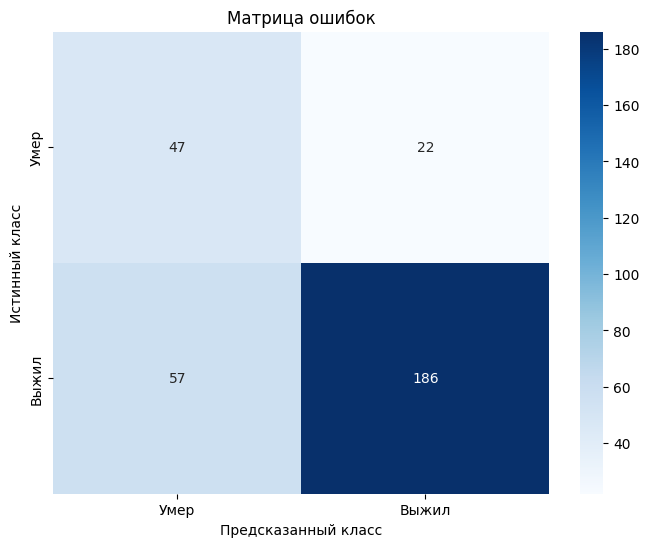


Топ-15 наиболее важных признаков:
                       feature  importance
2       mother_Betha Blackwood    3.939201
17   father_Aegon IV Targaryen    1.967776
101      spouse_Ella Lannister    1.348715
201         spouse_Whalen Frey    1.314311
18    father_Aegon V Targaryen    1.267937
148         spouse_Marna Locke    1.174741
118             spouse_Husband    1.163354
225                  age_value    1.162104
217              isAliveMother    1.119893
125           spouse_Jon Cupps    1.119049
124   spouse_Johanna Lannister    1.090816
218              isAliveFather    0.956026
7        mother_Mariah Martell    0.906684
99         spouse_Eddard Stark    0.841984
143       spouse_Luthor Tyrell    0.834017


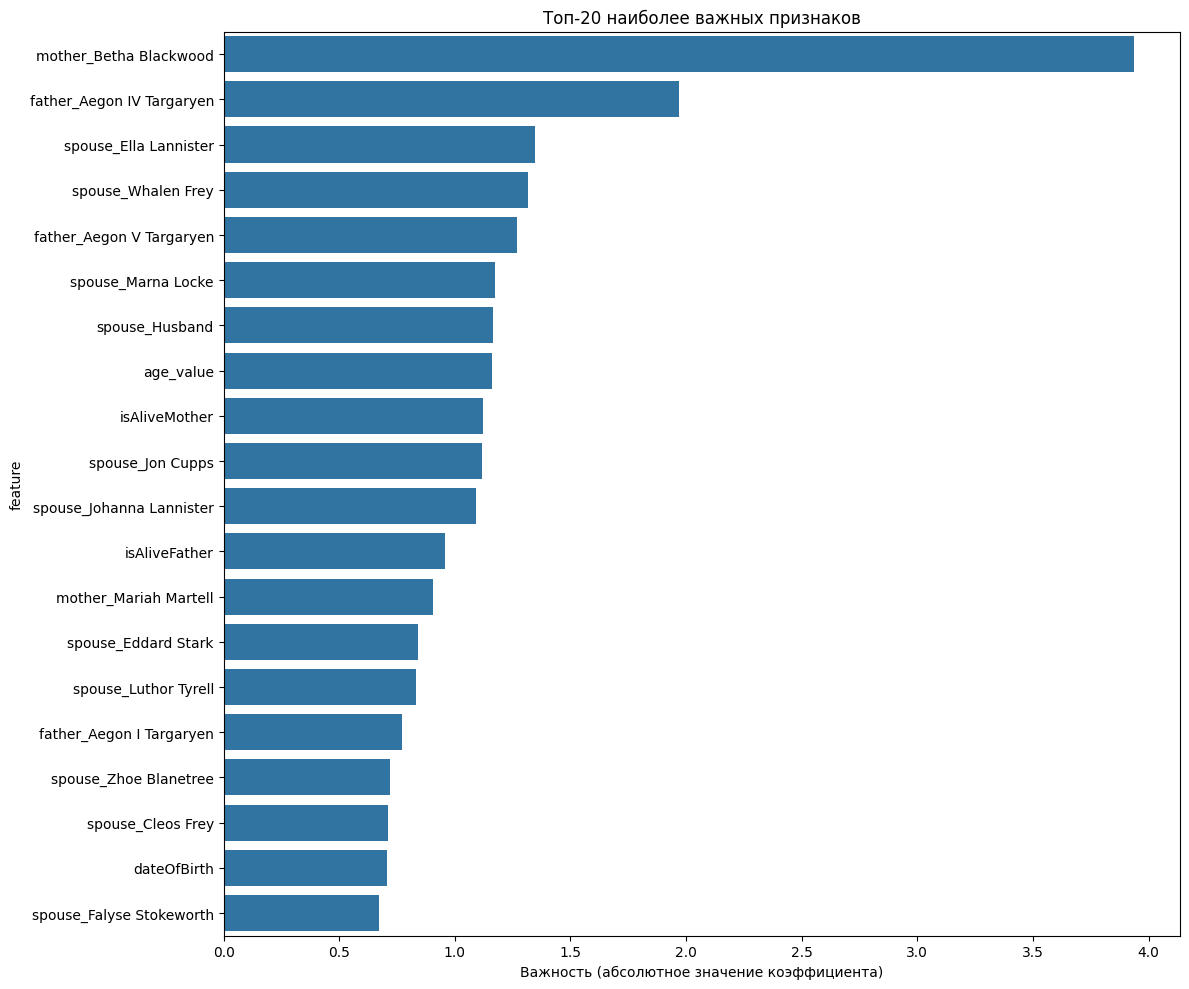


Пайплайн с One-Hot Encoding сохранен в файл 'pipeline_with_onehot.pkl'

Информация о преобразованных данных:
Размерность данных после преобразования: (1245, 227)
Количество признаков после One-Hot Encoding: 227


In [75]:
# Полная обработка данных с использованием One-Hot Encoding для всех категориальных признаков
print("Применяем One-Hot Encoding ко всем категориальным признакам...")

# 1. Сначала определим все категориальные и числовые признаки
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Категориальные признаки: {categorical_columns}")
print(f"Числовые признаки: {numerical_columns}")

# 2. Создаем пайплайн для обработки данных
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Препроцессинг для числовых признаков
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Препроцессинг для категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Объединяем преобразователи в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# 3. Создаем полный пайплайн с препроцессингом и моделью
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight='balanced'
    ))
])

# 4. Обучаем пайплайн
print("Обучение пайплайна с One-Hot Encoding...")
pipeline.fit(X_train, y_train)

# 5. Делаем предсказания
y_val_pred = pipeline.predict(X_val)
y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]

# 6. Оцениваем качество
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nAccuracy на валидационной выборке: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# 7. Визуализируем матрицу ошибок
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Умер', 'Выжил'],
            yticklabels=['Умер', 'Выжил'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

# 8. Анализ важности признаков
# Получаем имена признаков после One-Hot Encoding
feature_names = []
if 'cat' in pipeline.named_steps['preprocessor'].named_transformers_:
    ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
    cat_feature_names = ohe.get_feature_names_out(categorical_columns)
    feature_names.extend(cat_feature_names)

if 'num' in pipeline.named_steps['preprocessor'].named_transformers_:
    feature_names.extend(numerical_columns)

# Получаем коэффициенты модели
if hasattr(pipeline.named_steps['classifier'], 'coef_'):
    coefficients = pipeline.named_steps['classifier'].coef_[0]
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': abs(coefficients)
    }).sort_values('importance', ascending=False)

    print("\nТоп-15 наиболее важных признаков:")
    print(feature_importance.head(15))

    # Визуализируем важность признаков
    plt.figure(figsize=(12, 10))
    sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
    plt.title('Топ-20 наиболее важных признаков')
    plt.xlabel('Важность (абсолютное значение коэффициента)')
    plt.tight_layout()
    plt.show()

# 9. Сохраняем пайплайн
joblib.dump(pipeline, 'pipeline_with_onehot.pkl')
print("\nПайплайн с One-Hot Encoding сохранен в файл 'pipeline_with_onehot.pkl'")

# 10. Дополнительно: посмотрим на преобразованные данные
print("\nИнформация о преобразованных данных:")
X_train_processed = pipeline.named_steps['preprocessor'].transform(X_train)
print(f"Размерность данных после преобразования: {X_train_processed.shape}")
print(f"Количество признаков после One-Hot Encoding: {len(feature_names)}")

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [76]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [78]:
# Шаг 3. Предсказание на тестовых данных

# ваш код здесь

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [312, 1245]

Возможно, вы решите вернуться на несколько шагов и попробовать другие варианты преобразования и подбора признаков в модель. **Выберите** лучшую модель.

### Тестовый датасет

В самом начале нашего домашнего задания мы скачивали тестовый датасет. Загрузите его в Pandas DataFrame при помощи функции read_csv

In [ ]:
data = # ...

По аналогии с тем, как мы работали с обучающим датасетом, давайте посмотрим в тестовом датасете на статистики признаков с разными типами данных  

In [ ]:
#Подсказка
data_test.loc[data_test['age']<0] # Находим данные с ошибками в дате рождения и возрасте

In [ ]:
#Вы можете аккуратно поправить тестовые данные, воспользовавшись, например следующим кодом:
data_test.loc[1685, 'dateOfBirth'] = 278.
# замены в строке 1685: dateOfBirth -> 278. и age -> 0.
# замены в строке 1869: dateOfBirth -> 299. и age -> 0.

Преобразуйте признаки в тестовом датасете по тому же пайплайну, как вы преобразовывали обучающие данные. Примените вашу лучшую модель на тестовом датасете для получения прогноза целевой переменной `isAlive`

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)